In [1]:
#conda install -c conda-forge statsmodels
#conda install -c conda-forge lifelines


In [2]:
# Import required libraries :
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [3]:
# Read the dataset :
os.chdir('C:\\Users\\rtelang\\Box\\BIDA_F23\\Survival Models') 
data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [4]:
# Print the column names :

data.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

In [5]:
# Additional info about our dataset :

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


In [6]:
# Statistical info about our dataset :

data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


AxesSubplot(0.125,0.125;0.775x0.755)


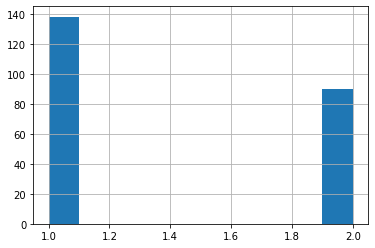

In [7]:
# Plot histogram for gender of patients :

print (data["sex"].hist())

In [8]:
# Create the object for our method :

kmf = KaplanMeierFitter() 

In [9]:
# Organize our data :

# If status = 1 , then dead = 0
# If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1


data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [10]:
# we want to fit the duration when the event is "dead"

kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [11]:
kmf.event_table

# Removed = Observed + Censored
# Censored = Person that didn't die.
# Observed = Persons that died.

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [12]:
# Calculating survival probability by hand :

event_at_0 = kmf.event_table.iloc[0,:]

#calculate the survival probability for t=0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0


1.0

In [13]:
# Calculating survival probability by hand :

event_at_5 = kmf.event_table.iloc[1,:]
print(event_at_5.observed)

#calculate the survival probability for t=0
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5


1


0.9956140350877193

In [14]:
# Calculating survival probability by hand :

event_at_11 = kmf.event_table.iloc[2,:]

#calculate the survival probability for t=0
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11


0.986784140969163

In [15]:
surv_after_5 = surv_for_0 * surv_for_5

surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11

print (surv_after_5)
print (surv_after_11)

0.9956140350877193
0.9824561403508771


In [16]:
# Our kmf object has done all these calculations for us :

kmf.predict(11)

0.9824561403508766

In [17]:
# For an array :

kmf.predict([0,5,11,12])

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64

In [18]:
# To get full list :
kmf
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.067127
883.0,0.050346
965.0,0.050346


In [19]:
# provides the number of days where on average 50% of patients died.

kmf.median_survival_time_

310.0

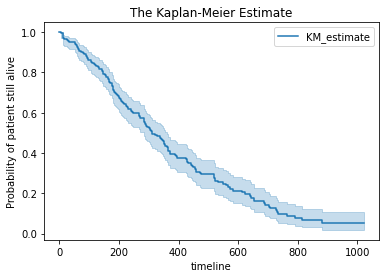

In [20]:
# Plot the graph :

kmf.plot()

plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [21]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
5.0,0.969277,0.999381
11.0,0.953935,0.993379
12.0,0.948120,0.990813
13.0,0.936682,0.985244
...,...,...
840.0,0.030728,0.123060
883.0,0.017866,0.108662
965.0,0.017866,0.108662
1010.0,0.017866,0.108662


In [22]:
# cumulative probability
#p(1022) = p(0) +......+p(1022)

kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
5.0,0.004386
11.0,0.017544
12.0,0.021930
13.0,0.030702
...,...
840.0,0.932873
883.0,0.949654
965.0,0.949654


<AxesSubplot:xlabel='timeline'>

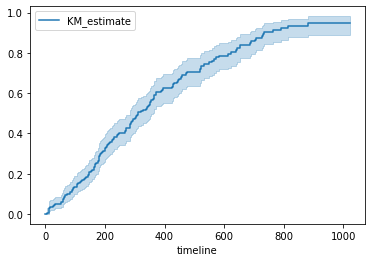

In [23]:
kmf.plot_cumulative_density()

          NA_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017660
12.0         0.022125
13.0         0.031114
...               ...
840.0        2.641565
883.0        2.891565
965.0        2.891565
1010.0       2.891565
1022.0       2.891565

[187 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

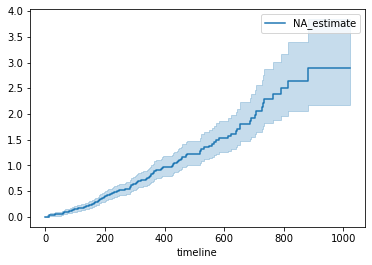

In [43]:
# Hazard FUnction : rate of dying instead of survival
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"],event_observed = data["dead"])
print (naf.cumulative_hazard_)
naf.plot()

In [44]:
# We can predict the value of a certain point :
print (naf.predict(1022))

2.8915648373471052


In [45]:
# We can predict the value of a certain point :

naf.predict(1022)

2.8915648373471052

In [46]:
# Dividing data into groups :
Male = data.query("sex == 1")
Female = data.query("sex == 2")

# kmf_m for male data.
# kmf_f for female data.
kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

In [47]:
Male

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,22.0,197,1,67,1,1.0,80.0,90.0,1500.0,2.0,0.0
222,223,1.0,116,2,76,1,1.0,80.0,80.0,NaN,0.0,1.0
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0,0.0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0.0


In [48]:
# we generate KM surves separately for males and females

kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")
print (kmf_m.event_table)
print (kmf_f.event_table)



          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       138      138
11.0            3         3         0         0      138
12.0            1         1         0         0      135
13.0            2         2         0         0      134
15.0            1         1         0         0      132
...           ...       ...       ...       ...      ...
814.0           1         1         0         0        5
840.0           1         0         1         0        4
883.0           1         1         0         0        3
1010.0          1         0         1         0        2
1022.0          1         0         1         0        1

[120 rows x 5 columns]
          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0        90       90
5.0             1         1         0         0       90
60.0   

In [49]:
print (kmf_m.predict(30))
print (kmf_f.predict(30))

print (kmf_m.survival_function_)
print (kmf_f.survival_function_)

0.9347826086956517
0.9888888888888887
              Male
timeline          
0.0       1.000000
11.0      0.978261
12.0      0.971014
13.0      0.956522
15.0      0.949275
...            ...
814.0     0.053571
840.0     0.053571
883.0     0.035714
1010.0    0.035714
1022.0    0.035714

[120 rows x 1 columns]
            Female
timeline          
0.0       1.000000
5.0       0.988889
60.0      0.977778
61.0      0.966667
62.0      0.955556
...            ...
735.0     0.124822
740.0     0.124822
765.0     0.083214
821.0     0.083214
965.0     0.083214

[88 rows x 1 columns]


Text(0.5, 1.0, 'KMF')

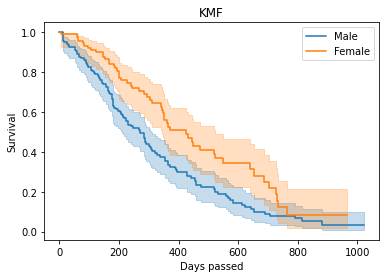

In [50]:
# Plot the survival_function data :
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")


              Male
timeline          
0.0       0.000000
11.0      0.021739
12.0      0.028986
13.0      0.043478
15.0      0.050725
...            ...
814.0     0.946429
840.0     0.946429
883.0     0.964286
1010.0    0.964286
1022.0    0.964286

[120 rows x 1 columns]
            Female
timeline          
0.0       0.000000
5.0       0.011111
60.0      0.022222
61.0      0.033333
62.0      0.044444
...            ...
735.0     0.875178
740.0     0.875178
765.0     0.916786
821.0     0.916786
965.0     0.916786

[88 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

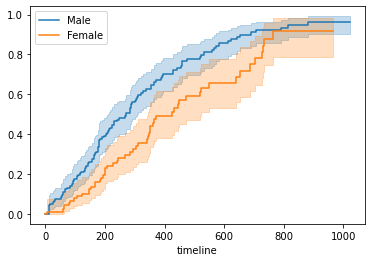

In [51]:

print (kmf_m.cumulative_density_)
print (kmf_f.cumulative_density_)

kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()

          NA_estimate
timeline             
0.0          0.000000
11.0         0.021899
12.0         0.029306
13.0         0.044287
15.0         0.051863
...               ...
814.0        2.831337
840.0        2.831337
883.0        3.164670
1010.0       3.164670
1022.0       3.164670

[120 rows x 1 columns]
          NA_estimate
timeline             
0.0          0.000000
5.0          0.011111
60.0         0.022347
61.0         0.033711
62.0         0.045205
...               ...
735.0        1.988977
740.0        1.988977
765.0        2.322310
821.0        2.322310
965.0        2.322310

[88 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

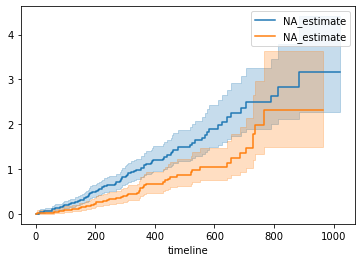

In [52]:

# Hazard FUnction :
from lifelines import NelsonAalenFitter
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

print (naf_m.cumulative_hazard_)
print (naf_f.cumulative_hazard_)

naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()


In [36]:

# Log-Rank Test

# Define variables :
T=Male['time']
E=Male['dead']
T1=Female['time']
E1=Female['dead']

from lifelines.statistics import logrank_test

results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57